In [34]:
# !pip install python-graphviz

#### 결정트리(DecisionTree)

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [36]:
iris = load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [37]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True
)

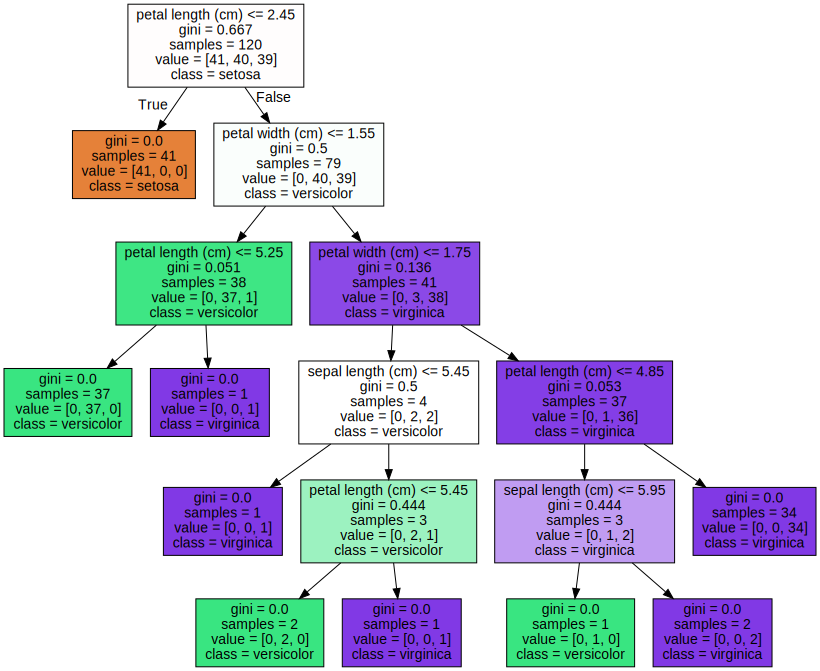

In [39]:
import graphviz

with open('tree.dot') as file:
  dot_graph=file.read()

graphviz.Source(dot_graph)

In [40]:
graphviz.version

<function graphviz.backend.version>

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


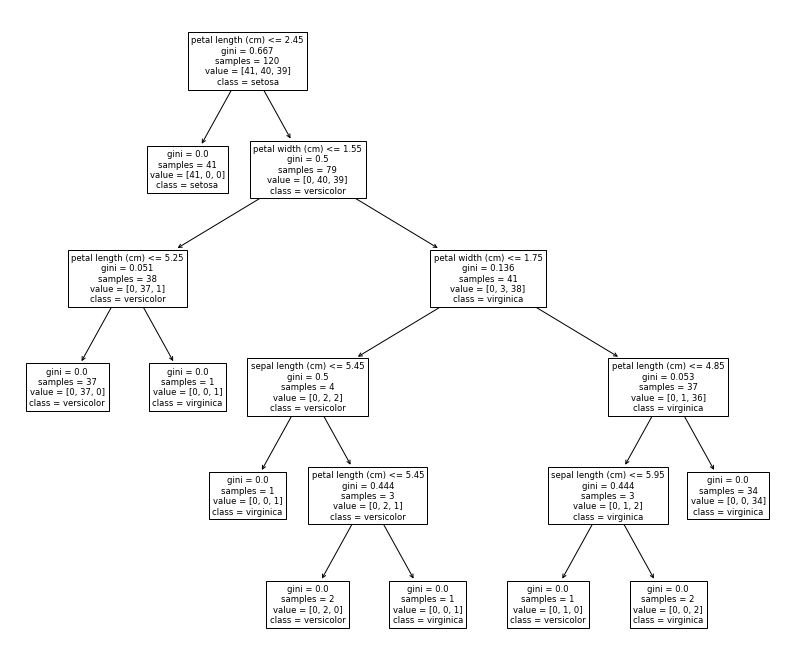

In [42]:
plt.figure(figsize=(14, 12))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [43]:
# 제약조건 : max_depth=3

dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [44]:
export_graphviz(
    dtc2, out_file='tree2.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True
)

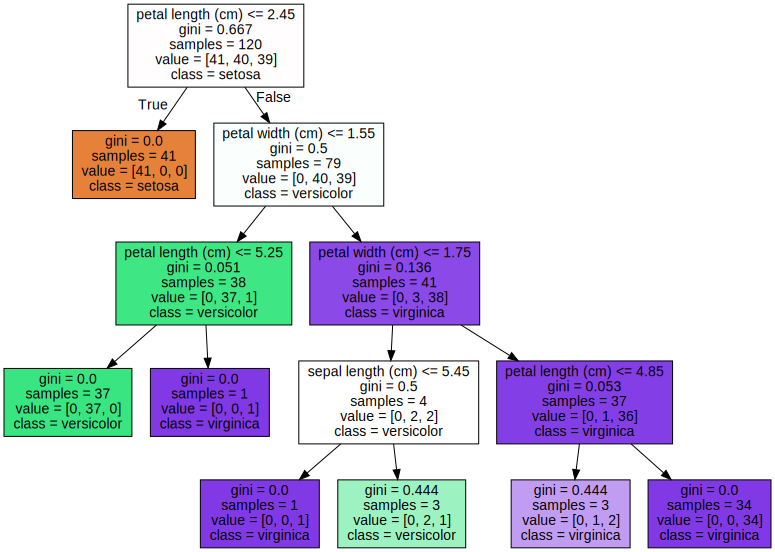

In [45]:
# 제약조건 : min_samples_split=4

dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc3, out_file='tree3.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True
)
with open('tree3.dot') as file:
  dot_graph=file.read()

graphviz.Source(dot_graph)

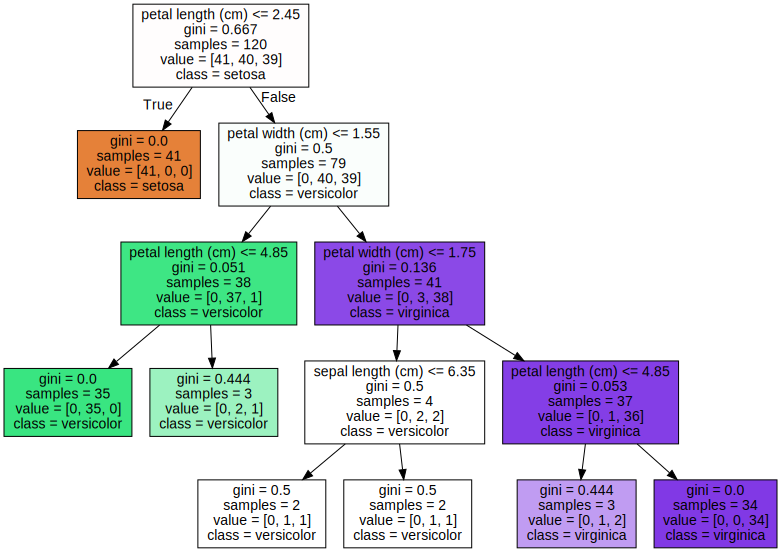

In [46]:
# 제약조건 : min_samples_leaf=2

dtc4 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc4, out_file='tree4.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True
)
with open('tree4.dot') as file:
  dot_graph=file.read()

graphviz.Source(dot_graph)

- 모델 비교

In [47]:
dtc.score(X_test,y_test),
dtc2.score(X_test,y_test),
dtc3.score(X_test,y_test),
dtc4.score(X_test,y_test)

0.9333333333333333

#### 학습된 모델이 제공하는 정보
1) Feature importance

In [48]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

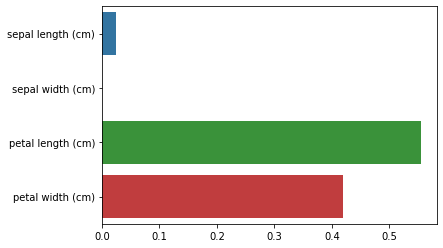

In [49]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()